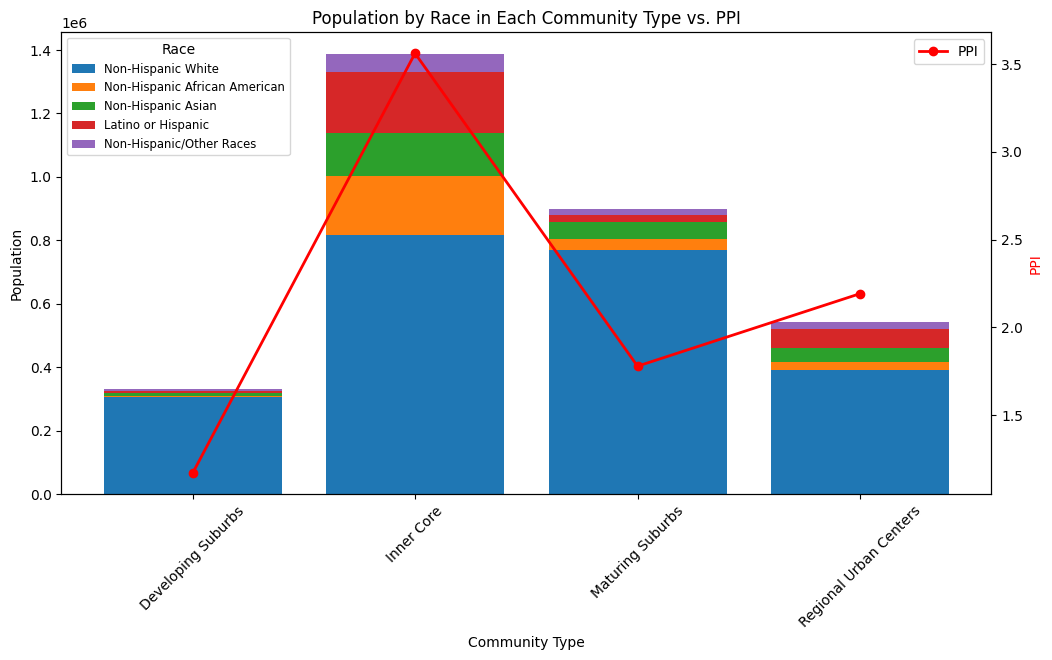

Maturing Suburbs          25848
Developing Suburbs        20919
Regional Urban Centers     7627
Inner Core                 6067
Name: commtype, dtype: int64
['Maturing Suburbs' 'Developing Suburbs' 'Inner Core'
 'Regional Urban Centers']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("mapc.health_mapc_ppi_g250.csv")

data = data[data['commtype'].notna()]
data = data[data['commtype'] != ' ']


grouped_data = data.groupby('commtype')[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].sum()

race_aliases = {
    'nhwhi_10': 'Non-Hispanic White',
    'nhaa_10': 'Non-Hispanic African American',
    'nhapi_10': 'Non-Hispanic Asian',
    'lat_10': 'Latino or Hispanic',
    'nhoth_10': 'Non-Hispanic/Other Races'
}

fig, ax1 = plt.subplots(figsize=(12, 6))  

race_categories = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
bottom = 0

for race in race_categories:
    ax1.bar(grouped_data.index, grouped_data[race], label=race_aliases[race], bottom=bottom)
    bottom += grouped_data[race]

ax1.set_xlabel('Community Type')
ax1.set_ylabel('Population')
ax1.set_title('Population by Race in Each Community Type vs. PPI')
ax1.set_xticks(grouped_data.index)
ax1.set_xticklabels(grouped_data.index, rotation=45)  
ax1.legend(title="Race", loc="upper left", fontsize='small')

ax2 = ax1.twinx()
ppi_data = data.groupby('commtype')['ppi5'].mean()
ax2.plot(ppi_data.index, ppi_data, marker='o', color='red', label='PPI', linewidth=2)
ax2.set_ylabel('PPI', color='red')
ax2.legend(loc="upper right")

plt.show()

unique_comm_types = data['commtype'].value_counts()
print(unique_comm_types)
print(data['commtype'].unique())

